In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Second-Position'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.504087 0.276401 0.871369 ... 0.463214 0.753358 0.833894]
 [0.506103 0.273689 0.878322 ... 0.463261 0.750616 0.831335]
 [0.508091 0.271147 0.873738 ... 0.465214 0.750646 0.831586]
 ...
 [0.499861 0.311969 0.919666 ... 0.479427 0.726151 0.862607]
 [0.499852 0.311945 0.909916 ... 0.479413 0.728764 0.852494]
 [0.499854 0.311986 0.918177 ... 0.479388 0.726172 0.863274]]
Length: 869


869


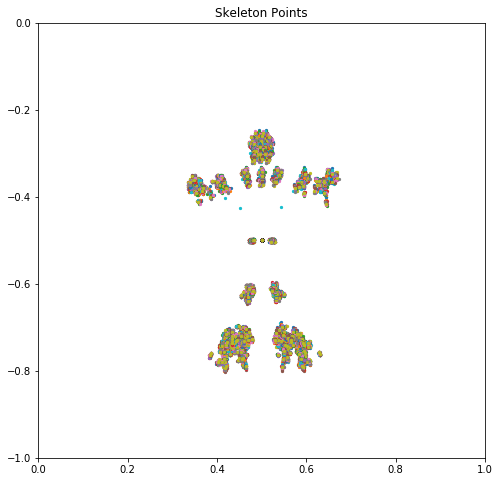

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

869


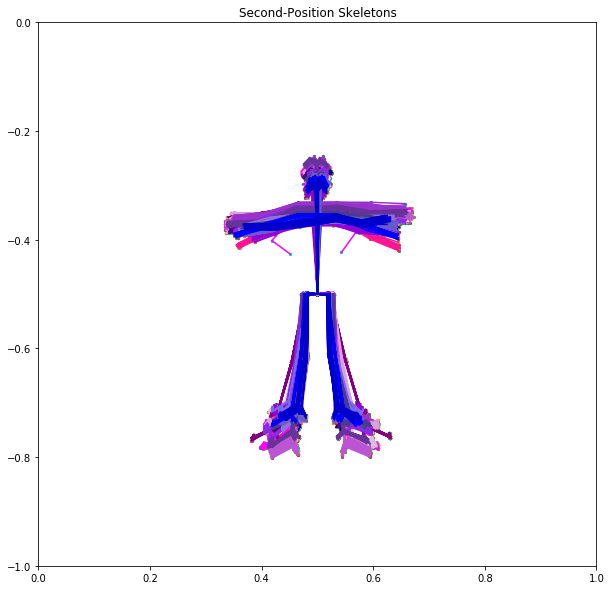

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.504087 0.504064 0.465276 ... 0.426476 0.428468 0.463214]
 [0.506103 0.504106 0.465316 ... 0.426542 0.428518 0.463261]
 [0.508091 0.508061 0.46729  ... 0.428446 0.430435 0.465214]
 ...
 [0.499861 0.501929 0.471291 ... 0.442713 0.446754 0.479427]
 [0.499852 0.501916 0.471276 ... 0.442699 0.44671  0.479413]
 [0.499854 0.50191  0.471267 ... 0.442675 0.444751 0.479388]]
[[-0.276401 -0.344712 -0.344698 ... -0.758777 -0.750663 -0.753358]
 [-0.273689 -0.341978 -0.341947 ... -0.756023 -0.747862 -0.750616]
 [-0.271147 -0.341988 -0.341968 ... -0.75611  -0.747975 -0.750646]
 ...
 [-0.311969 -0.371864 -0.374622 ... -0.7316   -0.728768 -0.726151]
 [-0.311945 -0.369271 -0.374637 ... -0.73169  -0.728834 -0.728764]
 [-0.311986 -0.37187  -0.374608 ... -0.731665 -0.728816 -0.726172]]
[[0.504087 0.504064 0.465276 ... 0.426476 0.428468 0.463214]
 [0.506103 0.504106 0.465316 ... 0.426542 0.428518 0.463261]
 [0.508091 0.508061 0.46729  ... 0.428446 0.430435 0.465214]
 ...
 [0.499861 0.501929 0.471291 ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[433.16129500000017, 433.7572060000003, 404.00999499999995, 354.6354499999994, 308.8052910000004, 464.240040999999, 514.1822640000006, 559.6300680000002, 434.5, 415.7587490000002, 410.23161300000004, 395.1339200000006, 454.6108120000004, 462.24324700000017, 480.36308600000007, 426.9127519999997, 439.6926949999997, 418.2857189999998, 448.318776, 510.72559600000034, 509.8034849999995, 474.9536660000002, 365.4987120000006, 367.0682590000002, 399.80441599999995]
[-247.37090800000018, -306.5589350000004, -306.735345, -320.6128609999998, -328.3405360000001, -305.211786, -316.0314329999999, -319.24552499999993, -434.5, -434.8356660000002, -537.7722459999999, -632.3961800000003, -434.6600699999997, -536.5339639999997, -632.7887449999993, -239.63684499999994, -239.34363599999992, -251.67089599999986, -251.48068000000032, -648.6377899999999, -642.1526800000005, -644.4601060000005, -650.1507049999999, -643.3816980000001, -643.541322]
[787.9169790000011, 788.7017940000002, 745.8613939999996, 745.8

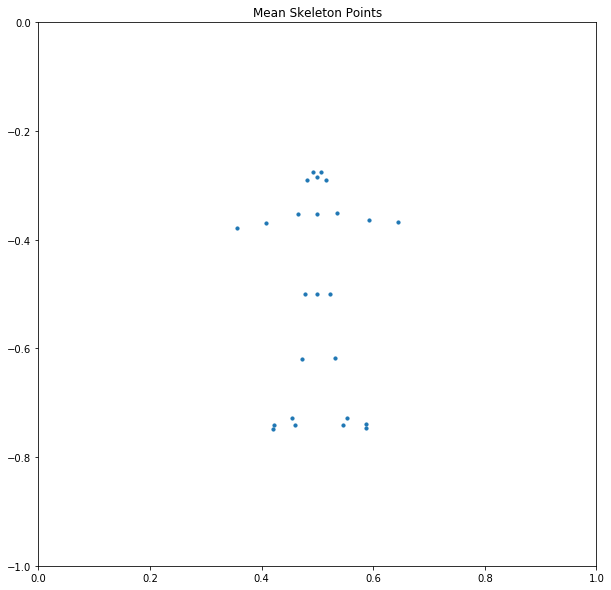

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.002930496706361292, 0.0021232634299002766, 0.0036093564038941484, 0.006692194166300951, 0.011734849228272459, 0.003534122175039892, 0.006161089935101562, 0.011524977773840326, 0.0, 0.0028982455275260244, 0.006374853792337531, 0.009975581483567275, 0.0034415052004408975, 0.005994224851693632, 0.010142379532834691, 0.003838273411894317, 0.0035462622389666586, 0.0030838587016759266, 0.002819050943671367, 0.01311399834960075, 0.012687068922154923, 0.010694443189263787, 0.012254205809063556, 0.01157352731824991, 0.009551495768576678]
Standard Deviations of Y values: [0.013107668508848555, 0.009082009301058302, 0.009247097574185058, 0.008174861021932364, 0.01203841451165601, 0.00872028289807861, 0.011051218102584803, 0.01540697350114965, 0.0, 0.001188070968755529, 0.009680400399578914, 0.019907994100812922, 0.0012704521543338626, 0.009472941933532856, 0.01942626331447776, 0.0129694544245597, 0.012979735279190992, 0.012741554699929766, 0.012707912856842325,

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)